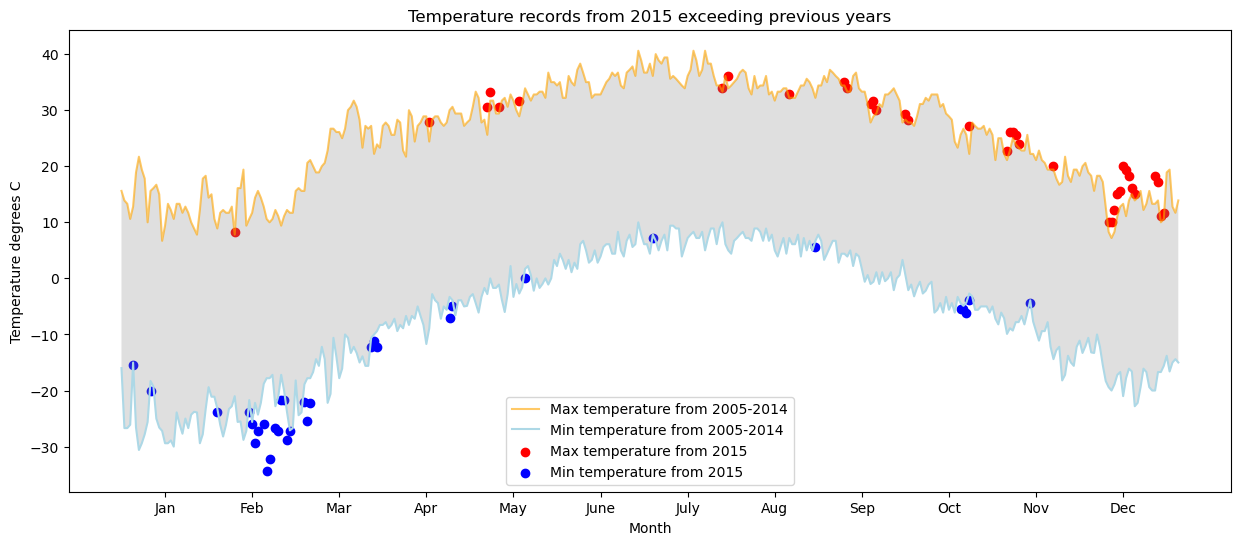

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Assignment 2/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Date'] = df['Date'].astype('datetime64[ns]') #Transform column date from string to datetime
df['Data_Value'] = df['Data_Value']*0.1 # Transform value of tenths of degrees celious to celcious
dfmax = df[df['Element']=='TMAX'].sort_values('Date') #sorting values
dfmin = df[df['Element']=='TMIN'].sort_values('Date') #Sorting values

# create a DataFrame of maximum temperature by date
dfmax = dfmax.groupby('Date').max() #creating dataframe of max values of each date
dfmax = dfmax.drop(['2008-02-29','2012-02-29']) #droping leap years

# create a DataFrame of minimum temperatures by date
dfmin = dfmin.groupby('Date').min() #creating dataframe of min values of each date
dfmin = dfmin.drop(['2008-02-29','2012-02-29']) #droping leap years

# calculate the minimum and maximum values for the day of the year for 2005 through 2014
dfmax1 = dfmax[dfmax.index<='2014-12-31']
dfmax1 = dfmax1.groupby(dfmax1.index.strftime('%m-%d'))['Data_Value'].max()
dfmax1 = dfmax1.to_frame()
dfmax2 = dfmax[dfmax.index>'2014-12-31']
dfmax2 = dfmax2.groupby(dfmax2.index.strftime('%m-%d'))['Data_Value'].max()
dfmax2 = dfmax2.to_frame()

# calculate the minimum and maximum values for the years 2015
dfmin1 = dfmin[dfmin.index<='2014-12-31']
dfmin1 = dfmin1.groupby(dfmin1.index.strftime('%m-%d'))['Data_Value'].min()
dfmin1 = dfmin1.to_frame()
dfmin2 = dfmin[dfmin.index>'2014-12-31']
dfmin2 = dfmin2.groupby(dfmin2.index.strftime('%m-%d'))['Data_Value'].min()
dfmin2 = dfmin2.to_frame()

dfmax2015 = dfmax2[dfmax2['Data_Value']>dfmax1['Data_Value']]
dfmin2015 = dfmin2[dfmin2['Data_Value']<dfmin1['Data_Value']]
plt.figure(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Temperature degrees C')
plt.title('Temperature records from 2015 exceeding previous years')
plt.plot(dfmax1,color='orange', alpha = 0.6)
plt.plot(dfmin1,color='lightblue')
plt.scatter(dfmax2015.index, dfmax2015,color='red')
plt.scatter(dfmin2015.index, dfmin2015,color='blue')
plt.gca().fill_between(range(len(dfmax1)), dfmax1['Data_Value'], dfmin1['Data_Value'], facecolor='gray', alpha=0.25)
plt.legend(['Max temperature from 2005-2014','Min temperature from 2005-2014','Max temperature from 2015','Min temperature from 2015'])
plt.xticks(np.linspace(15,15 + 30*11, num= 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'June', r'July', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec',))


plt.savefig('Temperatures.png')